In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Bollywood.csv')

In [ ]:
df.head(5)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [ ]:
genre = df['Genre'].value_counts()
print("movies per Genre:")
display(genre)
print("\nmost popular Genre:\n",genre.idxmax(), genre.max())

movies per Genre:


,count
Genre,
Comedy,36
Drama,35
Thriller,29
Romance,25
Action,24



most popular Genre:
 Comedy 36


In [ ]:
crosstab = pd.crosstab(df['Genre'], df['ReleaseTime'])

print(f"cross tabulation between Genre and ReleaseTime:\n{crosstab}")

cross tabulation between Genre and ReleaseTime:
ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


In [ ]:
df['ReleaseDate'] = pd.to_datetime(df['SlNo'], errors='coerce')


df['ReleaseMonth'] = df['ReleaseDate'].dt.month_name()

month_counts = df['ReleaseMonth'].value_counts()

max_month = month_counts.idxmax()
max_count = month_counts.max()

print(f"month of the year, maximum number movie releases:\n{max_month} ({max_count} movies)")

month of the year, maximum number movie releases:
January (149 movies)


In [ ]:
h_budget = df[df['Budget'] >= 25]

max_month = h_budget.idxmax()
max_count = h_budget.max()

print(f"\nMonth with most high-budget movie releases:  {max_count}")



Month with most high-budget movie releases:  SlNo                                             149
Release Date                                9-Jan-15
MovieName                            Zilla Ghaziabad
ReleaseTime                                        N
Genre                                       Thriller
Budget                                           150
BoxOfficeCollection                            735.0
YoutubeViews                                23171067
YoutubeLikes                                  101275
YoutubeDislikes                                11888
ReleaseDate            1970-01-01 00:00:00.000000149
ReleaseMonth                                 January
Month                                              1
dtype: object


In [ ]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
top_roi_movies = df[['MovieName', 'ROI']].sort_values(by='ROI', ascending=False).head(10)
print("top 10 movies with maximum return on investment:\n", top_roi_movies)

top 10 movies with maximum return on investment:
                      MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


In [ ]:
release = df.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False)
display(release)

'average ROI for different release times:\n'

,ROI
ReleaseTime,
LW,1.127205
FS,0.973853
HS,0.850867
N,0.657722


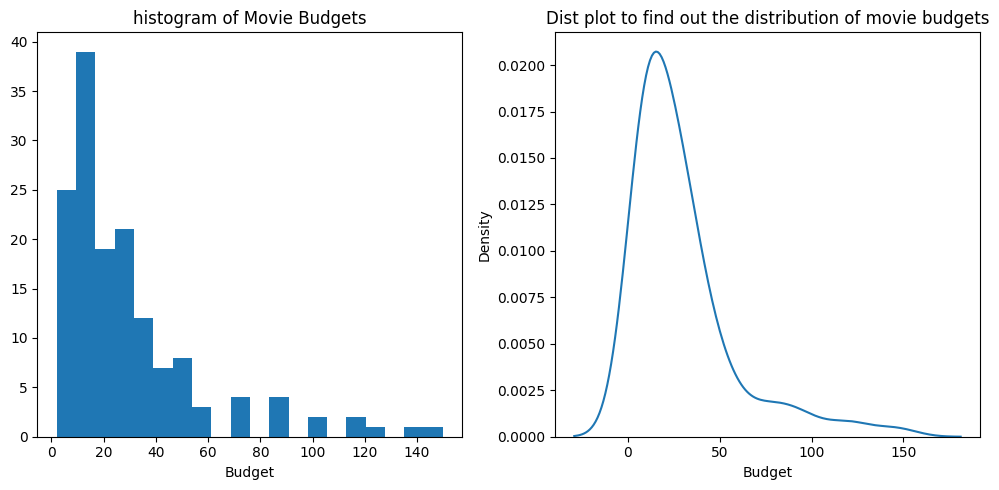

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(df['Budget'], bins=20)
plt.title("histogram of Movie Budgets")
plt.xlabel("Budget")

plt.subplot(1, 2, 2)
sb.kdeplot(df['Budget'])
plt.title("Dist plot to find out the distribution of movie budgets")
plt.xlabel("Budget")

plt.tight_layout()
plt.show()


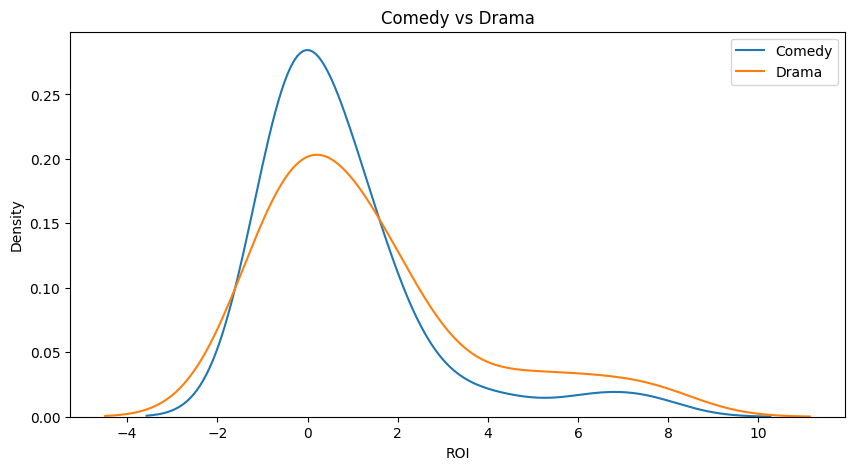

In [ ]:
plt.figure(figsize=(10, 5))
sb.kdeplot(df[df['Genre'] == 'Comedy']['ROI'], label='Comedy')
sb.kdeplot(df[df['Genre'] == 'Drama']['ROI'], label='Drama')
plt.title("Comedy vs Drama")
plt.legend()
plt.show()

In [ ]:
correlation = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print("Correlation between Box Office and YouTube Likes:", correlation)

Correlation between Box Office and YouTube Likes: 0.6825165877731297


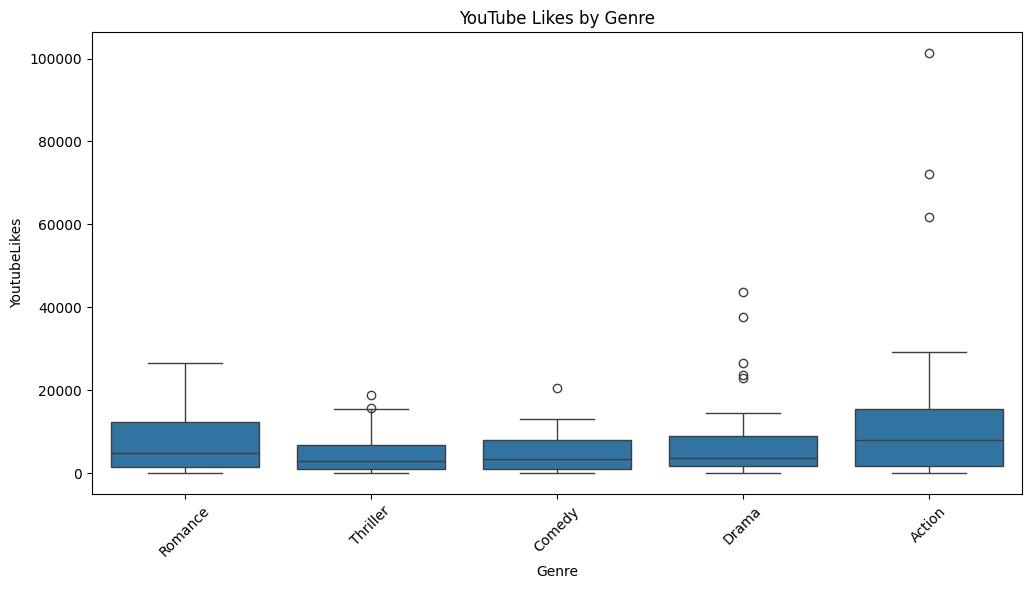

In [ ]:
plt.figure(figsize=(12, 6))
sb.boxplot(x='Genre', y='YoutubeLikes', data=df)
plt.xticks(rotation=45)
plt.title("YouTube Likes by Genre")
plt.show()

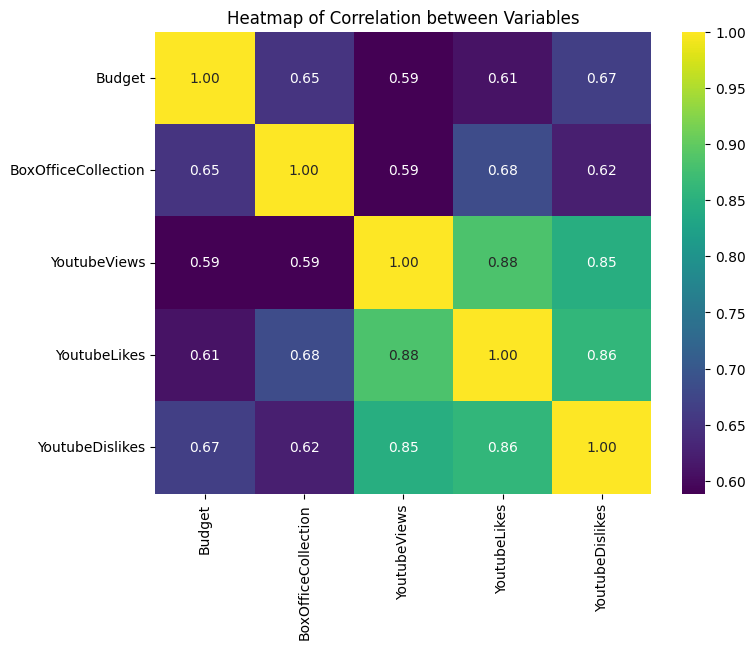

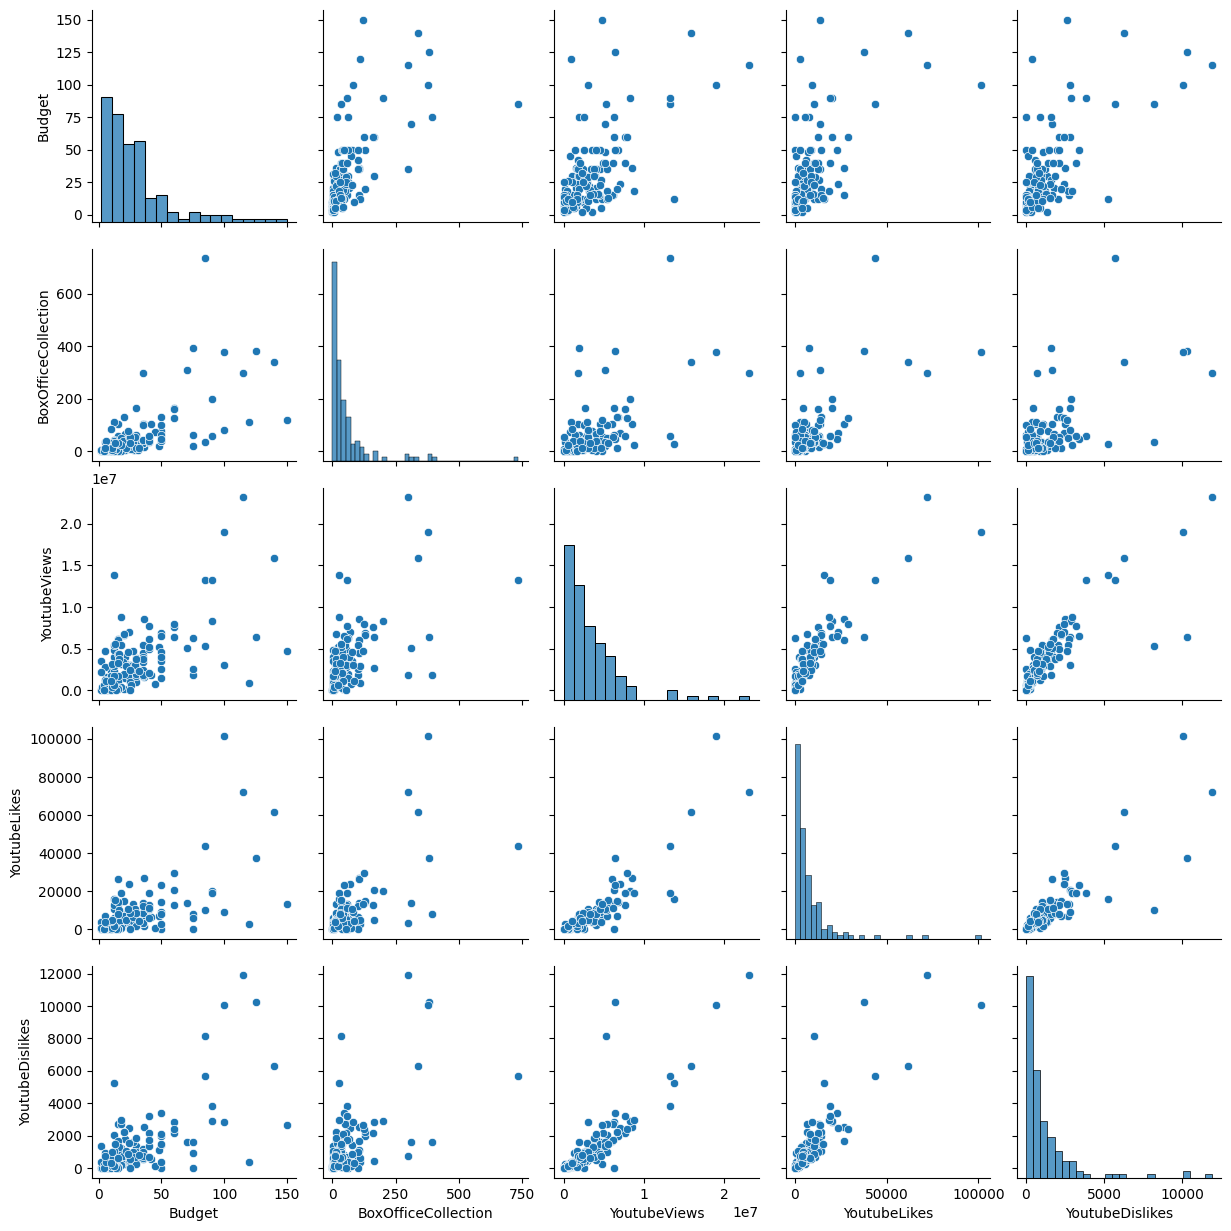

In [ ]:
corr_vars = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap of Correlation between Variables")
plt.show()

sb.pairplot(df[corr_vars])
plt.show()
